In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_targets[0]

15.2

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [8]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
train_data.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.80933376e-15, -7.80453809e-17,
       -5.25047552e-15,  6.43187374e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.05526149e-16,  2.36614908e-14,  5.96710525e-15,
        6.13920356e-16])

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
  return model



In [11]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
#num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
[train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]],
axis=0)
partial_train_targets = np.concatenate(
[train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]],
axis=0)
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
validation_data=(val_data, val_targets),
epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

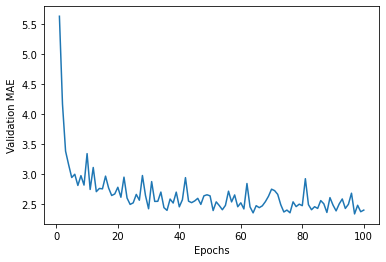

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

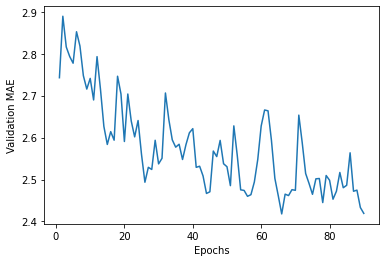

In [14]:
def smooth_curve(points, factor=0.6):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
  
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=1)

Epoch 1/80
26/26 [==============================] - 1s 4ms/step - loss: 20.6165 - mae: 20.6165
Epoch 2/80
26/26 [==============================] - 0s 3ms/step - loss: 15.8555 - mae: 15.8555
Epoch 3/80
26/26 [==============================] - 0s 3ms/step - loss: 10.0749 - mae: 10.0749
Epoch 4/80
26/26 [==============================] - 0s 3ms/step - loss: 6.2355 - mae: 6.2355
Epoch 5/80
26/26 [==============================] - 0s 4ms/step - loss: 4.8713 - mae: 4.8713
Epoch 6/80
26/26 [==============================] - 0s 3ms/step - loss: 4.0589 - mae: 4.0589
Epoch 7/80
26/26 [==============================] - 0s 4ms/step - loss: 3.6584 - mae: 3.6584
Epoch 8/80
26/26 [==============================] - 0s 4ms/step - loss: 3.3872 - mae: 3.3872
Epoch 9/80
26/26 [==============================] - 0s 3ms/step - loss: 3.2498 - mae: 3.2498
Epoch 10/80
26/26 [==============================] - 0s 3ms/step - loss: 3.0833 - mae: 3.0833
Epoch 11/80
26/26 [==============================] - 0s 3ms/ste

In [16]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 2.6355 - mae: 2.6355


In [17]:
model.save("Boston_House_Price_Prediction.h5")